## 1. Exploratory Data Analysis
Before building the topic modelling model with the university reviews dataset, I will conduct an exploratory data analysis. It is split into 2 parts - **1.1 Simple Statistics of the Dataset**, **1.2 Wordclouds** - to provide a a brief overview of the dataset's content, structure, and patterns.

### 1.1 Simple Statistics of the Dataset

 In this section, I will examine basic statistics of the dataset such as the number of reviews, average review length, distribution of ratings and the most common tokens.


In [1]:
# Import all useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go

In [2]:
# Import CSV file
# Get file path of the review dataset
file_path = 'raw_output.csv'

# Read the CSV file into a pandas dataframe
df = pd.read_csv(file_path)

In [3]:
# Show basic information of the dataset
# Show the first few rows
display(df.head())

# Show the length
shape = df.shape
number_of_reviews = shape[0]
print('There are', number_of_reviews, 'reviews')

# Show the features
feature_list = df.columns.tolist()
number_of_features = shape[1]
print('There are', number_of_features, 'features:', feature_list)

# Show the basic statistics
display(df.describe())

# Count the number of reviews per rating
rating_counts = df['rating'].value_counts()
print(rating_counts)

,name,rating,comment
0,Aberystwyth University,5,I applied to Aberystwyth University as I was l...
1,University of the Arts London,4,the facilities
2,University of the Arts London,4,There needs to be more community and everythin...
3,University of the Arts London,5,need more courses
4,University of the Arts London,3,I think the Graduate Diploma course is a bit s...


There are 26731 reviews
There are 3 features: ['name', 'rating', 'comment']


,rating
count,26731.000000
mean,4.324679
std,0.840188
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


rating
5    13514
4     9671
3     2637
2      529
1      380
Name: count, dtype: int64


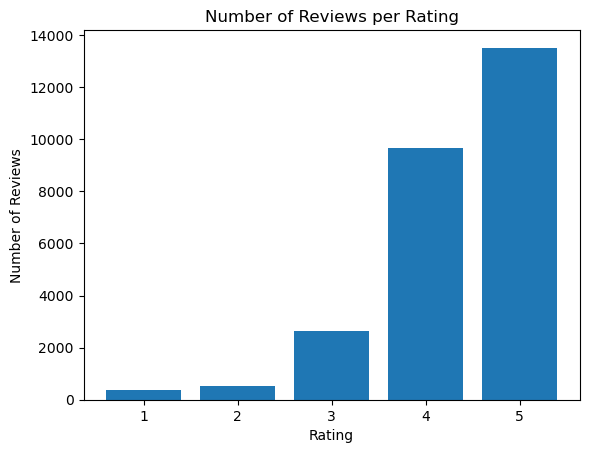

In [4]:
# Plot the rating's distribution

# Create a bar plot
plt.bar(rating_counts.index, rating_counts.values)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews per Rating')

# Show plot
plt.show()

The dataset's distribution skews towards higher score reviews but this does not affect later analysis because I will  be primarily looking into highscore reviews to identify the features of good universities.

In [5]:
# Filter the reviews with ratings 4-5 into a seperate df
highscore_df = df[df['rating'].isin([4,5])]

# Filter rows where comment is a string
highscore_df = highscore_df[highscore_df['comment'].apply(lambda x: isinstance(x, str))] # Boolean mask

# Show the head of the filtered dataset
display(highscore_df.head())

# Show the shape
print(highscore_df.shape)

,name,rating,comment
0,Aberystwyth University,5,I applied to Aberystwyth University as I was l...
1,University of the Arts London,4,the facilities
2,University of the Arts London,4,There needs to be more community and everythin...
3,University of the Arts London,5,need more courses
6,University of the Arts London,5,Perfect :)


(21478, 3)


In [6]:
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation

# Tokenise the comments into words
tokenized_comments = [word_tokenize(comment.lower()) for comment in highscore_df['comment']]

# Remove punctuations
cleaned_tokenized_comments = []
for comment in tokenized_comments:
    cleaned_comment = [word for word in comment if word not in punctuation]
    cleaned_tokenized_comments.append(cleaned_comment)

# Add a new column of the tokenized comments to the high-score df
highscore_df['tokenized_comment'] = cleaned_tokenized_comments

display(highscore_df.head())

,name,rating,comment,tokenized_comment
0,Aberystwyth University,5,I applied to Aberystwyth University as I was l...,"[i, applied, to, aberystwyth, university, as, ..."
1,University of the Arts London,4,the facilities,"[the, facilities]"
2,University of the Arts London,4,There needs to be more community and everythin...,"[there, needs, to, be, more, community, and, e..."
3,University of the Arts London,5,need more courses,"[need, more, courses]"
6,University of the Arts London,5,Perfect :),[perfect]


In [7]:
# Fetch all words from the tokenized_comment column and store in a single list
all_words = [word for row in cleaned_tokenized_comments for word in row]
all_words[:5] # Test if it works

['i', 'applied', 'to', 'aberystwyth', 'university']

Average number of words per review: 28
The number of words in the longest review: 709
The number of words in the shortest review: 0


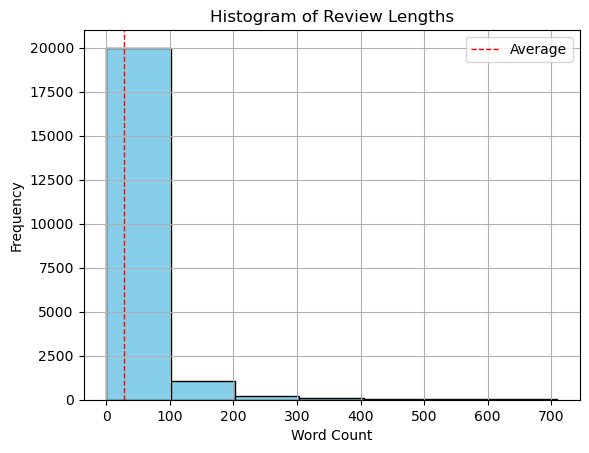

In [8]:
# Average number of words per review
words_per_review = len(all_words) / number_of_reviews
print("Average number of words per review:", round(words_per_review))

# Length per review
lengths = [len(comment) for comment in cleaned_tokenized_comments]

# The longest review
longest_review = max(lengths)
print("The number of words in the longest review:", longest_review)

# The shortest review
shortest_review = min(lengths)
print("The number of words in the shortest review:", shortest_review)

# Plotting the histogram of the distribution of number of words in each reviews
# Define the bin width
bin_width = 100  # Set the desired bin width

# Calculate the range of your data
data_range = (shortest_review, longest_review)

# Calculate the number of bins based on the bin width and data range
num_bins = int((data_range[1] - data_range[0]) / bin_width)

plt.hist(lengths, bins=num_bins, color='skyblue', edgecolor='black') 
plt.title('Histogram of Review Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)

# Add a vertical line to indicate the average value
plt.axvline(x=words_per_review, color='red', linestyle='dashed', linewidth=1, label='Average')

# Display the legend
plt.legend()

plt.show()

From the result, we can see quite a large difference in the average number of words per review and the longest review. Also, the number of words in the shortest review is 0, meaning that there is review with no content at all! We will deal with this issue in the later pre-processing stage.

In [9]:
from nltk.probability import FreqDist

# Get the frequency of each word
freq_dist = FreqDist(all_words)

# Show the 5 most common words and their frequencies
most_common = freq_dist.most_common(5)
print("Most common words:", most_common)

#freq_dist.plot(50, title='50 Most Common Words', cumulative=False)

Most common words: [('the', 39180), ('and', 31275), ('to', 22231), ('is', 17698), ('of', 15618)]


In [10]:
# Convert the FreqDist object into a pandas DataFrame
freq_df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency'])

# Sort the words by descending frequencies
freq_df_sorted = freq_df.sort_values(by='Frequency', ascending=False)

freq_df_sorted.head()

,Word,Frequency
21,the,39180
35,and,31275
2,to,22231
45,is,17698
48,of,15618


In [11]:
x = freq_df_sorted['Word'][:50] # Plot only the first 50 most common words
y = freq_df_sorted['Frequency'][:50] # Plot their frequencies

data = [go.Bar(x=x,
               y=y,
               marker= dict(colorscale='Jet',
                            color = y
                            ))]

layout = go.Layout(
    title='Top 50 (uncleaned) word frequencies in reviews'
)

fig = go.Figure(data=data, layout=layout)

fig.show()

### 1.2 Word cloud
Using word cloud is often a good way to visualise the frequency of words in a linguistic dataset. To only show words that give meaning context, stopwords like "the", "and" and "i" are removed.

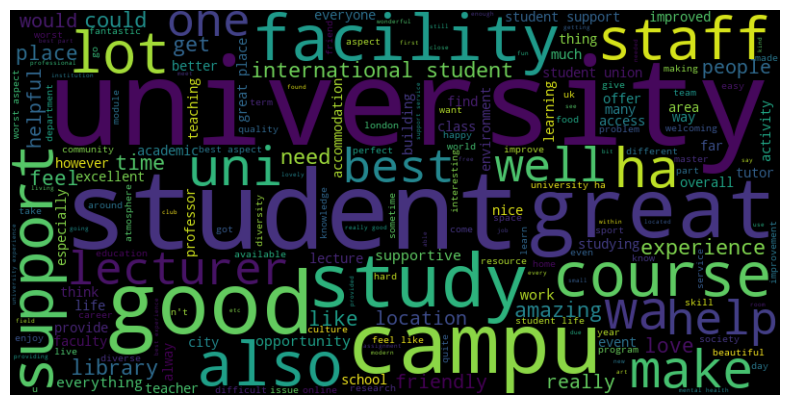

In [12]:
# Generate word cloud to visualise the frequencies of words
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in all_words]

# Stopwords from NLTK
stop_words = set(stopwords.words('english'))

cloud = WordCloud(width=800, height=400, stopwords=stop_words)
cloud.generate(' '.join(lemmatized_tokens))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We then got "university", "campu", "great", "student" etc. standing out as the biggest candidates, which is quite predictable to be appearing A LOT in university reviews... However, if we're to only look at the word cloud to decide, for instance, what makes a university a good university, these words are not particularly useful.

Looking into some relatively smaller words, such as "facility", "support"... these seem more relevant, right? So let's further remove some generic words.

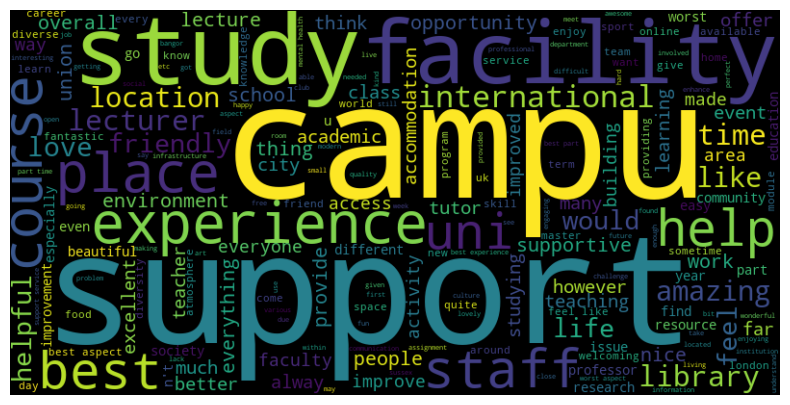

In [13]:
# Add generic terms to the existing STOPWORDS set
stop_words.update(["university", "student", "great", "good", "really", "lot", "ha", "wa", "also", "could", "need", "make", "well", "one", "get"]) # Further adjust this depending on the word cloud output

# Generate word cloud with updated stopwords
cloud = WordCloud(width=800, height=400, stopwords=stop_words)
cloud.generate(' '.join(lemmatized_tokens))

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

After adjusting the stop words, we come to a set of more useful words, such as "campu", "support", "study", "facility", "experience" etc.

## 2. Data Pre-processing

In the following, I will continue with my **highscore_df** because high score reviews are the focus of what students prefer the most in unversity experience.

### 2.1 Lemmatization, Removal of Stop Words and Missing Values

Following the last part on word cloud, here I will lemmatise the tokens, remove stop words from them and then finally remove rows with empty token list.

In [14]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatization = lambda row: [lemmatizer.lemmatize(word) for word in row]
highscore_df["tokenized_comment"] = highscore_df["tokenized_comment"].apply(lemmatization)

# Remove stopwords
stop_words.update(["n a", "nil", "na", "—", "’", "'s"])

remove_stopwords = lambda row: [word for word in row if word not in stop_words]
highscore_df["tokenized_comment"] = highscore_df["tokenized_comment"].apply(remove_stopwords)

In [15]:
# Handle empty/missing values
print("Original shape:", highscore_df.shape)

# See how many tokenized_comment's length is 0
print("There are", lengths.count(0), "empty tokenzied_comment")

# Check it again in the dataset
rows_to_remove = highscore_df[highscore_df["tokenized_comment"].apply(len) == 0]

# Remove empty rows from the dataset
cleaned_highscore_df = highscore_df.drop(rows_to_remove.index)
print("Shape after removal:", cleaned_highscore_df.shape)

# Reorder the index
cleaned_highscore_df = cleaned_highscore_df.reset_index(drop=True)

Original shape: (21478, 4)
There are 1008 empty tokenzied_comment
Shape after removal: (19333, 4)


### 2.2 Further Cleaning

As observed in the EDA, the dataset's comment word count is varied. Let's do some further investigation to decide whether we should exclude very short and/or very long comments.

In [16]:
# Word count for each comment
word_count = cleaned_highscore_df["tokenized_comment"].apply(len)
cleaned_highscore_df["word_count"] = word_count

# Sort the df by word count
cleaned_highscore_df_sorted_descending = cleaned_highscore_df.sort_values(by="word_count", ascending=False)
cleaned_highscore_df_sorted = cleaned_highscore_df.sort_values(by="word_count")

display(cleaned_highscore_df_sorted_descending.head())
display(cleaned_highscore_df_sorted.head())


,name,rating,comment,tokenized_comment,word_count
15258,Nottingham Trent University,4,Staff is kind and supportive; giving good advi...,"[staff, kind, supportive, giving, advice, deta...",334
12634,University of Suffolk,5,There is nothing as great as hoping and seeing...,"[nothing, hoping, seeing, dream, come, fruitio...",333
2315,Queen Mary University of London,4,Facilities:\nQueen Mary University of London s...,"[facility, queen, mary, london, stand, forefro...",332
16765,University of Portsmouth,5,I have absolutely loved my experience with UoP...,"[absolutely, loved, experience, uop, would, hi...",331
15748,University of Gloucestershire,5,Really it is giving a great learning opportuni...,"[giving, learning, opportunity, career, opport...",327


,name,rating,comment,tokenized_comment,word_count
2664,University of Salford,5,Okay,[okay],1
7762,Brunel University London,5,Pretty good,[pretty],1
10822,Edge Hill University,4,I think it’s great!,[think],1
15016,University of Reading,4,Zz,[zz],1
10826,"Queen Margaret University, Edinburgh",5,The experience has been good,[experience],1


In [17]:
pd.set_option('display.max_colwidth', None)

# Investigate the lengthy comments
display(cleaned_highscore_df_sorted_descending["tokenized_comment"].iloc[:5])

# Investigate the short comments
display(cleaned_highscore_df_sorted["tokenized_comment"].iloc[:5])

15258                                                                                                                                                                              [staff, kind, supportive, giving, advice, detailed, feedback, encouraging, discussion, safe, space, psychology, multiple, facility, e.g., experimental, lab, vr, etc, use, project, bsc, msc, library, open, 24h-, use, printers/pcs, rent, laptop, read/loan, book, study, area, suit, e.g., silent, area, book, academic, support, session, group, study, rooms/tables, many, society, sport, gym, study, city, campus, live, near, it-, easy, access, shop, night, life, entertainment, employability, team, amazing, helped, placement, bsc, degree, listened, concern, lack, resource, mental, health, job, interviews-, went, department, gathered, different, psychology, related, question, might, come, job, interview, staff, expected, answer, employability, team, sends, advertisement, multiple, volunteering/, job, opportunity, put, 

2664           [okay]
7762         [pretty]
10822         [think]
15016            [zz]
10826    [experience]
Name: tokenized_comment, dtype: object

Averge number of words per review: 18
The number of words in the longest review: 334
The number of words in the shortest review: 1


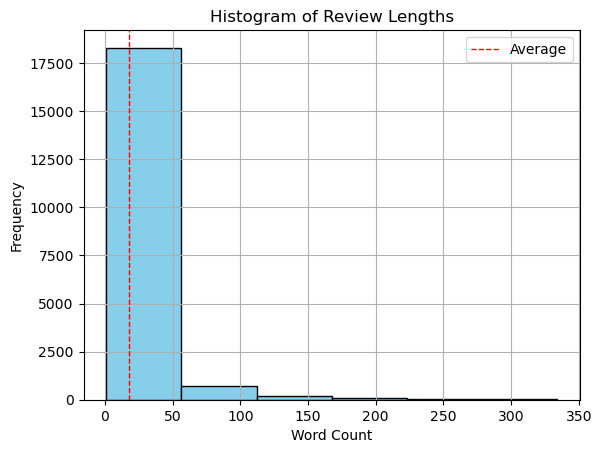

In [18]:
lengths = cleaned_highscore_df["word_count"]

# Average review length
words_per_review = np.mean(lengths)
print("Averge number of words per review:", round(words_per_review))

# The longest review
longest_review = max(lengths)
print("The number of words in the longest review:", longest_review)

# The shortest review
shortest_review = min(lengths)
print("The number of words in the shortest review:", shortest_review)

# Plotting the histogram of the distribution of number of words in each reviews
# Define the bin width
bin_width = 50  # Set the desired bin width

# Calculate the range of your data
data_range = (shortest_review, longest_review)

# Calculate the number of bins based on the bin width and data range
num_bins = int((data_range[1] - data_range[0]) / bin_width)

plt.hist(lengths, bins=num_bins, color='skyblue', edgecolor='black') 
plt.title('Histogram of Review Lengths')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)

# Add a vertical line to indicate the average value
plt.axvline(x=words_per_review, color='red', linestyle='dashed', linewidth=1, label='Average')

# Display the legend
plt.legend()

plt.show()

Let's dismiss reviews that are shorter than average length to ensure the dataset will not be filled with terse comments.

In [21]:
pd.reset_option('display.max_colwidth')

# Remove rows with short lengths
df_for_modelling = cleaned_highscore_df_sorted_descending[cleaned_highscore_df_sorted_descending["word_count"] >= 18]

df_for_modelling = df_for_modelling.reset_index(drop=True)
display(df_for_modelling.head())
df_for_modelling.shape

,name,rating,comment,tokenized_comment,word_count
0,Nottingham Trent University,4,Staff is kind and supportive; giving good advi...,"[staff, kind, supportive, giving, advice, deta...",334
1,University of Suffolk,5,There is nothing as great as hoping and seeing...,"[nothing, hoping, seeing, dream, come, fruitio...",333
2,Queen Mary University of London,4,Facilities:\nQueen Mary University of London s...,"[facility, queen, mary, london, stand, forefro...",332
3,University of Portsmouth,5,I have absolutely loved my experience with UoP...,"[absolutely, loved, experience, uop, would, hi...",331
4,University of Gloucestershire,5,Really it is giving a great learning opportuni...,"[giving, learning, opportunity, career, opport...",327


(5691, 5)

Now, the dataset is reduced from 19333 rows to 5691 rows.

In [20]:
# Output the file for modelling
df.to_csv('cleaned_review.csv', index=False)